# CIFAR 10 classification with CNN

In [2]:
from keras import backend as K
from keras.models import Sequential,Model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.layers import LeakyReLU, ELU
import numpy as np
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf

Using TensorFlow backend.


In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True   
sess = tf.Session(config=config)

KTF.set_session(sess)

## Utils

In [4]:
dictionary = {0:'airplane',1:'autommovil',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
def getLabelName(index):
    return dictionary.get(yyt[index][0])
    
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

def normalization(dataset):
    mean = np.mean(x_train,axis=(0,1,2,3))
    desviation = np.std(x_train,axis=(0,1,2,3))
    return (dataset-mean)/(desviation+ K.epsilon())

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
 

## Preparing data

Labels:

![title](labels.PNG)

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
yyt = y_train.copy()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
x_train = normalization(x_train)
x_test = normalization(x_test)
 
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Create model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3),kernel_regularizer=regularizers.l2(1e-4),input_shape=x_train.shape[1:]))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3),kernel_regularizer=regularizers.l2(1e-4)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64, (3,3),kernel_regularizer=regularizers.l2(1e-4)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),kernel_regularizer=regularizers.l2(1e-4)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
model.summary()
 

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_

## Data aumentation

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
    )
datagen.fit(x_train)
batch_size = 64

## Compile model and save weights

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=50,verbose=1,validation_data=(x_test,y_test))

model.save_weights('modelwithoutDropout2layersRegulizer.h5') 


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
781/781 [==============================] - 18s 23ms/step - loss: 1.4461 - acc: 0.5065 - f1: 0.4600 - val_loss: 12.9765 - val_acc: 0.1959 - val_f1: 0.1959
Epoch 2/50
781/781 [==============================] - 16s 21ms/step - loss: 1.0696 - acc: 0.6373 - f1: 0.6214 - val_loss: 10.4897 - val_acc: 0.3503 - val_f1: 0.3503
Epoch 3/50
781/781 [==============================] - 16s 21ms/step - loss: 0.9299 - acc: 0.6875 - f1: 0.6796 - val_loss: 11.6712 - val_acc: 0.2772 - val_f1: 0.2772
Epoch 4/50
781/781 [==============================] - 16s 21ms/step - loss: 0.8511 - acc: 0.7146 - f1: 0.7100 - val_loss: 11.1771 - val_acc: 0.3081 - val_f1: 0.3081
Epoch 5/50
781/781 [==============================] - 16s 21ms/step - loss: 0.7922 - acc: 0.7361 - f1: 0.7327 - val_loss: 10.4465 - val_acc: 0.3535 - val_f1: 0.3535
Epoch 6/50
781/781 [==============================] - 16s 21ms/step - loss: 0.7536 - acc: 0.7508 - f1: 0.7488 - val_loss: 10.47

Epoch 49/50
781/781 [==============================] - 17s 21ms/step - loss: 0.4480 - acc: 0.8714 - f1: 0.8726 - val_loss: 10.7140 - val_acc: 0.3405 - val_f1: 0.3405
Epoch 50/50
781/781 [==============================] - 16s 21ms/step - loss: 0.4457 - acc: 0.8726 - f1: 0.8745 - val_loss: 10.0417 - val_acc: 0.3823 - val_f1: 0.3823


In [8]:
model.load_weights('modelwithoutDropout2layersRegulizer.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1])


## Show kernels

NameError: name 'pyplot' is not defined

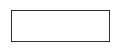

In [20]:
filters, biases = model.layers[3].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
pyplot.show()

## Show middle layers

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse


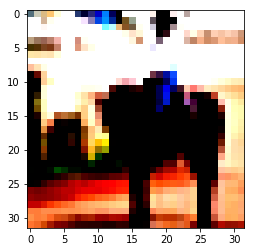

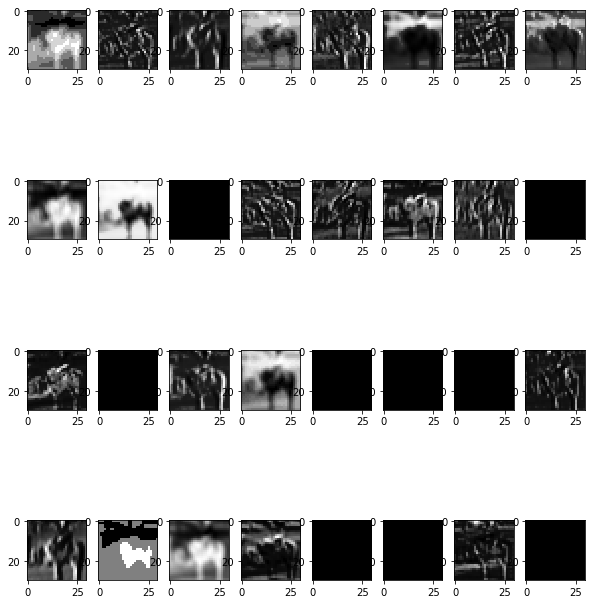

In [9]:
print(getLabelName(11))
plt.imshow(x_train[11])
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
            
activations = activation_model.predict(x_train[11].reshape(1,32,32,3))
display_activation(activations, 8, 4, 2)


## Getting test scores

In [15]:
scores = model.evaluate(x_test, y_test)
print("accuracy: "+str(scores[1])+" f1: "+str(scores[2]))

10000/10000 [==============================] - 1s 117us/step
accuracy: 0.3823 f1: 0.3822999403953552
